In [1]:
import sys
sys.path.append('../..')
import ugent

In [2]:
from strands import Schrodinger2D, Rectangle
import numpy as np

def V(x, y):
    return (x*x+1)*(y*y+1)

s = Schrodinger2D(V, Rectangle(-5.5,5.5,-5.5,5.5), gridSize=(92,92), maxBasisSize=60)
seigs = np.array(s.eigenvalues(31))
seigs

array([ 3.19591809,  5.52674387,  5.52674387,  7.55780333,  8.03127234,
        8.44458136,  9.92806106,  9.92806106, 11.31181705, 11.31181705,
       12.10325358, 12.20117897, 13.33233127, 14.34826853, 14.34826853,
       14.45047872, 14.58055632, 16.15141922, 16.15141922, 16.51719246,
       16.56487193, 17.89457828, 17.89457828, 18.58339173, 18.75620427,
       18.75620427, 18.97619443, 19.59447512, 20.73576816, 20.92016436,
       21.29311189])

In [3]:
from pyslise2d import Pyslise2D

def V(x, y):
    return (1+x*x)*(1+y*y)

def check(opt):
    N, tol = opt
    mx = 5.5
    my = 5.5
    p = Pyslise2D(V, -mx,mx, -my,my, tolerance=tol, N=N, steps_per_sector=3)
    eigs = []
    for i, E, m in p.eigenvaluesByIndex(0, 34):
        for _ in range(m):
            eigs.append(E)
    return np.array(eigs[:30])

In [8]:
from pqdm.processes import pqdm
from itertools import product


options = list(product([6, 8, 10, 12, 14, 16, 18, 20, 22], [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]))
results = dict(zip(options, pqdm(options, check, n_jobs=12)))

QUEUEING TASKS | :   0%|          | 0/45 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/45 [00:00<?, ?it/s]

MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: Error in index estimate
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max search depth reached
MatsliseND: max

COLLECTING RESULTS | :   0%|          | 0/45 [00:00<?, ?it/s]

KeyError: (8, 1e-05)

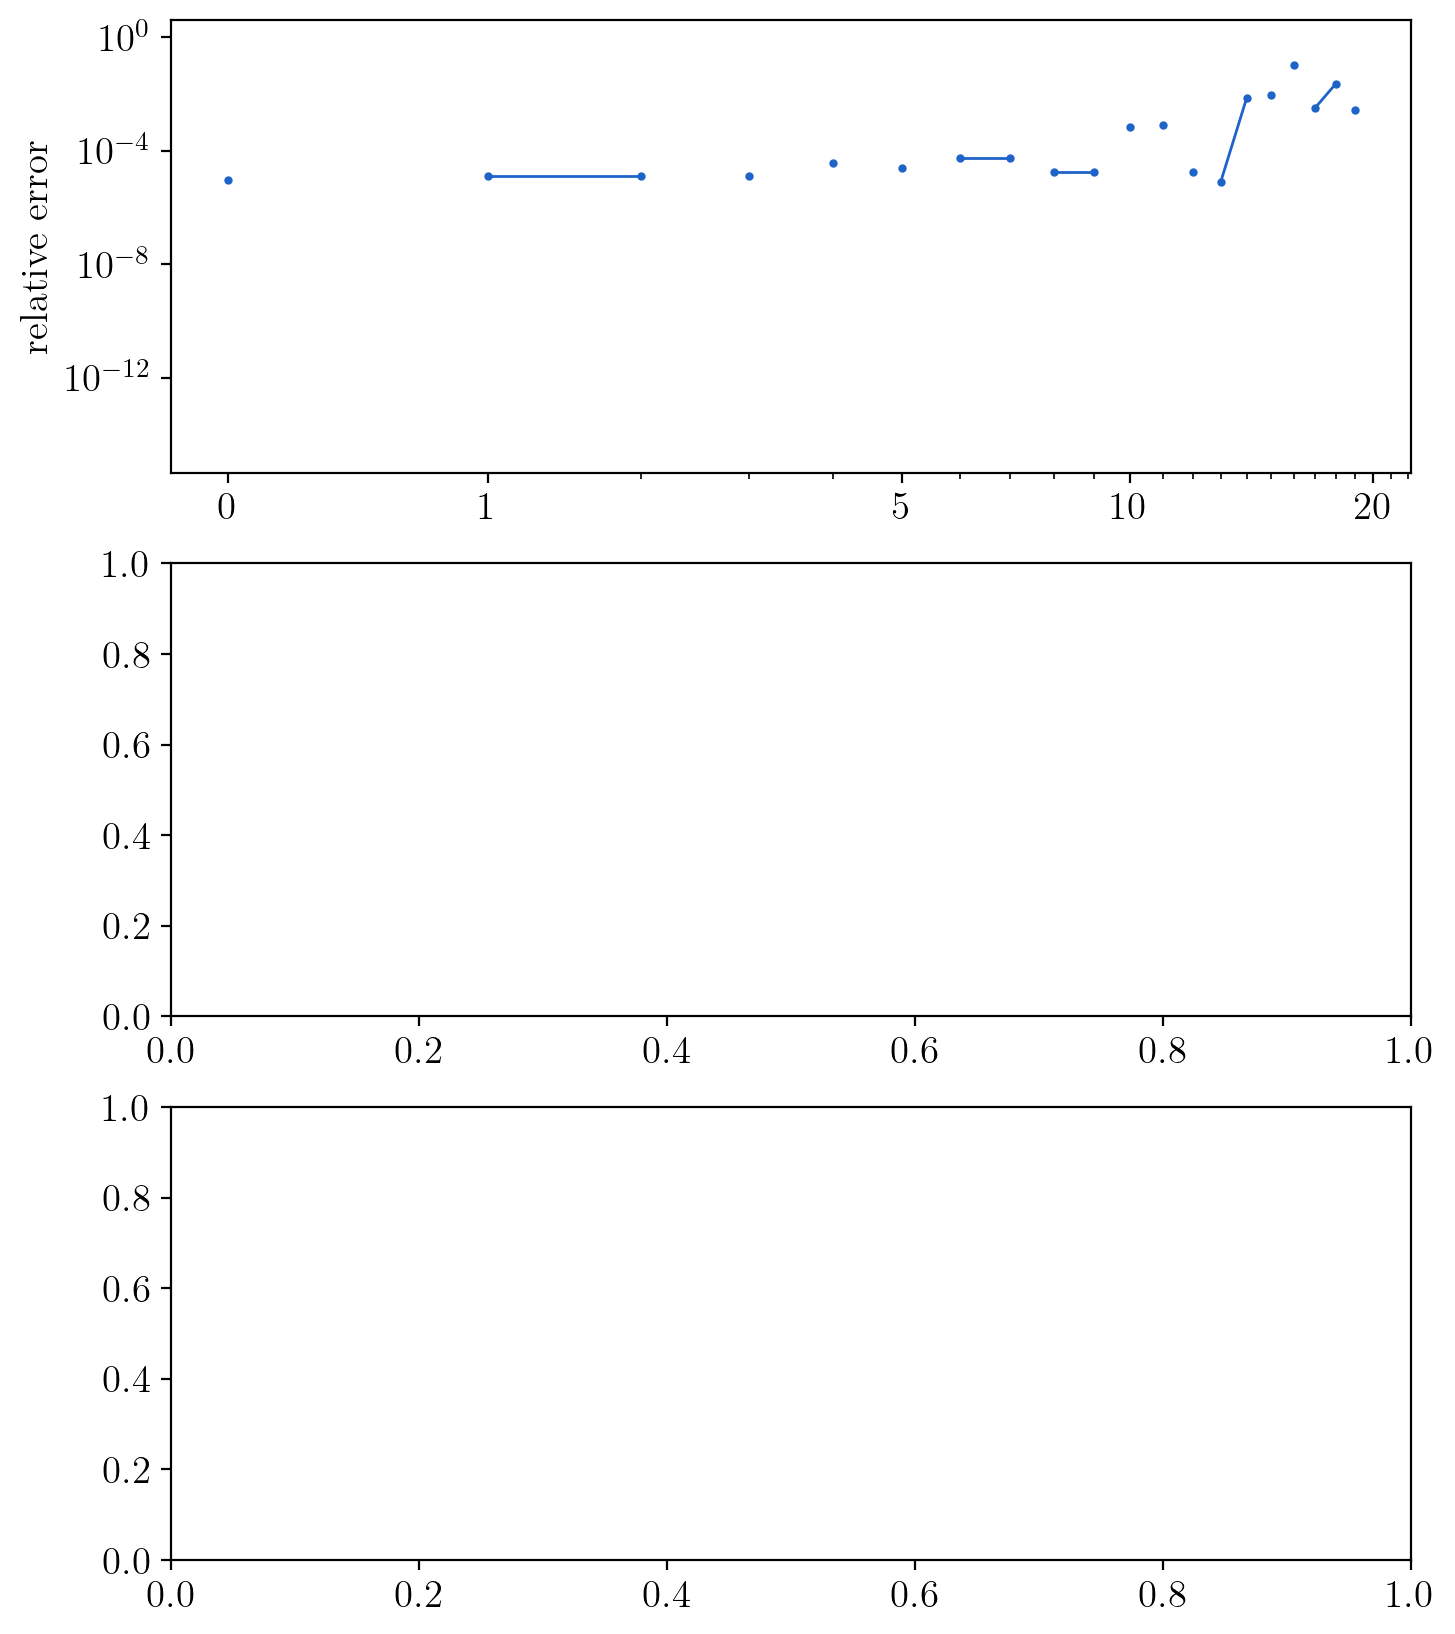

In [7]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 1, figsize=(8, 10), dpi=200)

Ns = [8, 14, 22]
tols = [1e-4, 1e-5, 1e-6]

mults = [1,2,1,1,1,2,2,1,1,1,2,1,1,2,1]

for ni, N in enumerate(Ns):
    ax = axes[ni]
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=10)
    xticks = [1, 2, 6, 11, 21, 31]
    ax.set_xticks(xticks, labels=[f"${x-1}$" for x in xticks])
    ax.set_xticks(range(31), minor=True, labels=[])
    ax.set_ylim(2**-51, 2**2)
    ax.set_ylabel("relative error")
    if ni == 2:
        ax.set_xlabel("eigenvalue")

    for i, tol in enumerate(tols):
        j = 0
        
        raw = results[N, tol]
        k = len(raw)
        r = np.abs((raw - seigs[:k])/seigs[:k])

        kwargs = dict(
            label=f"$tol={tol}$",
            color=ugent.palet[i],
            marker='.', ls='-', lw=1, markersize=4,
        )
        for mult in mults:
            d = r[j:j+mult]
            ax.plot(range(j + 1, j+len(d)+1), d, **kwargs)
            if j == 0:
                del kwargs["label"]
            j += mult
            if j >= len(r):
                break

    ax.set_title(f"$N = {N}$", y=0.835, x=0.025, loc="left")


axes[0].legend(*axes[2].get_legend_handles_labels(), loc="lower right")
    
fig.show()
plt.savefig(f"ixaru.pdf", bbox_inches="tight")

In [72]:
len(results[6,1e-4])

20

In [ ]:
from pyslise2d import Pyslise2D
from math import log, sqrt

class EvalCounter:
    def __init__(self, f):
        self.count = 0
        self.f = f
    
    def __call__(self, *args, **kwargs):
        self.count += 1
        return self.f(*args, **kwargs)

@EvalCounter
def Vcounter(x, y):
    return (1+x*x)*(1+y*y)

V = Vcounter.f

mx = 5.5
my = 5.5
N = 19
p = Pyslise2D(Vcounter, -mx,mx, -my,my, tolerance=1e-7, N=N)
Vcounter.count

In [4]:
from pyslise2d import Pyslise2D

def V(x, y):
    return (1+x*x)*(1+y*y)

#var('x, y')
#V = fast_callable((1+x**2)*(1+y**2), vars=[x, y], domain=float)

problem = Pyslise2D(V, -5.5,5.5, -5.5,5.5, tolerance=1e-8)
result = problem.eigenvaluesByIndex(0, 12)
result 

[(0, 3.195918111211807, 1),
 (1, 5.526744074936144, 2),
 (3, 7.557803572849634, 1),
 (4, 8.031272363607144, 1),
 (5, 8.44458175674524, 1),
 (6, 9.92806115722765, 2),
 (8, 11.311817613784662, 2),
 (10, 12.103253444544334, 1),
 (11, 12.201179825464704, 1),
 (12, 13.332332973722595, 1)]

In [15]:
values = [
    3.1959181, 5.5267439, 7.5578033, 8.0312723,
    8.4445814, 9.9280611, 11.3118171, 12.1032536,
    12.2011790, 13.3323313]

for ixaru, (index, toon, mult) in zip(values, result):
    err, err_e = f"{abs(toon-ixaru):.1e}".split("e")
    head = " = ".join(f"E_{{{i}}}" for i in range(index, index+mult))
    print(f"${head}$ & ${ixaru}$ & ${toon:.11}$ & ${err}({int(err_e)})$ \\\\")

$E_{0}$ & $3.1959181$ & $3.1959181112$ & $1.1(-8)$ \\
$E_{1} = E_{2}$ & $5.5267439$ & $5.5267440748$ & $1.7(-7)$ \\
$E_{3}$ & $7.5578033$ & $7.5578035728$ & $2.7(-7)$ \\
$E_{4}$ & $8.0312723$ & $8.0312723637$ & $6.4(-8)$ \\
$E_{5}$ & $8.4445814$ & $8.4445817565$ & $3.6(-7)$ \\
$E_{6} = E_{7}$ & $9.9280611$ & $9.9280611619$ & $6.2(-8)$ \\
$E_{8} = E_{9}$ & $11.3118171$ & $11.311817614$ & $5.1(-7)$ \\
$E_{10}$ & $12.1032536$ & $12.103253445$ & $1.6(-7)$ \\
$E_{11}$ & $12.201179$ & $12.201179825$ & $8.3(-7)$ \\
$E_{12}$ & $13.3323313$ & $13.332332972$ & $1.7(-6)$ \\


In [4]:
y_counts = [11,15,19,23,27,31]


p = Pyslise2D(V, -mx,mx, -my,my, tolerance=1e-10, N=N, x_symmetric=True, steps_per_sector=1)
print(len(p.__sectors))
Es = [E for i, E, m in p.eigenvaluesByIndex(0,10)]
exact = Es

data = []

for i, y_count in enumerate(y_counts):
    p = Pyslise2D(V, -mx,mx, -my,my, tolerance=1e-10, N=N, x_symmetric=True, steps_per_sector=1, y_count=y_count)
    print(len(p.__sectors))
    row = []
    for E, correct in zip(Es, exact):
        j = len(row)
        row.append(p.eigenvalue(E)[0] - correct)
        if i > 0:
            row.append(log(abs(data[i-1][j]/row[j]))/log(y_count/y_counts[i-1]))
        else:
            row.append(0)
    data.append(row)

for row in data:
    print('    '.join(f"{err:10.1e} {order:8.2f}" for err, order in zip(row[::2], row[1::2])))

137
11
15
19
23
27
31
  -1.0e-05     0.00       2.9e-05     0.00      -1.1e-05     0.00      -9.5e-05     0.00      -1.9e-05     0.00       1.4e-04     0.00      -3.1e-05     0.00      -1.8e-04     0.00
  -5.2e-07     9.63       8.8e-07    11.27      -2.9e-07    11.82      -4.6e-06     9.76      -2.5e-06     6.56       6.4e-06     9.87      -4.2e-06     6.39      -8.8e-06     9.74
   2.0e-08    13.72       2.4e-07     5.50       1.6e-06    -7.27      -3.1e-07    11.37       4.3e-07     7.36       1.3e-07    16.35       3.8e-07    10.20      -4.1e-06     3.26
   1.9e-08     0.24       1.0e-07     4.59       7.2e-07     4.22       2.9e-07     0.38       4.5e-07    -0.20       5.2e-07    -7.09      -3.3e-08    12.82       4.5e-06    -0.55
   2.5e-08    -1.59       6.2e-08     2.99       4.8e-07     2.57       1.0e-07     6.63       4.5e-08    14.31       1.5e-07     7.85       3.6e-07   -14.97       6.5e-08    26.47
   4.8e-09    12.00       1.6e-09    26.28       2.5e-07     4.84       5

ModuleNotFoundError: No module named 'matplotlib.color'